**Project Title:**<br>
Prediction of hotel reservation cancellation of a customer with reservation details using Machine Learning.

**Dataset Link:**
https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

**About this file**
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.
<br><br>
## Data Columns Description
<br>

### Independant Variables

**Booking_ID**: unique identifier of each booking<br>
**no_of_adults**: Number of adults<br>
**no_of_children**: Number of Children<br>
**no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel<br>
**no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel<br>
**type_of_meal_plan:** Type of meal plan booked by the customer:<br>
**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)<br>
**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.<br>
**lead_time:** Number of days between the date of booking and the arrival date<br>
**arrival_year:** Year of arrival date<br>
**arrival_month:** Month of arrival date<br>
**arrival_date:** Date of the month<br>
**market_segment_type:** Market segment designation.<br>
**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)<br>
**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking<br>
**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking<br>
**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)<br>
**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)<br>


### Dependant Variables

**booking_status:** Flag indicating if the booking was canceled or not.<br>

### Aim of the project:
This project aims to analyze and observe the patterns and relations between the columns to identify the reasons behind the cancellations of hotel reservations and develop a machine-learning algorithm that can predict the customer who might cancel the reservation based on the customer details provided.
<br>
### Research question/ hypothesis:

Is the customer cancelling hotel reservation due to the average price change of the same room type inbetween the lead time ?


In [21]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [8]:
d = pd.read_csv("Hotel Reservations.csv")
d.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
# Check the misssing data from the dataset in all the columns, if there are any null values, isnull() will show that as TRUE.
# If there are no null values, it will show false.
d.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

Since there are no null values in the dataset for 36275 rows across all the 19 columns, data is full.<br>

### Remove UnWanted Columns

Lets Understand the data column wise, to remove unwanted data.<br>


In [11]:
d["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [12]:
d["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [13]:
d["arrival_year"].unique()

array([2017, 2018], dtype=int64)

In [14]:
d["market_segment_type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

column **Booking_ID** is not needed for analysis as it conists of unique id data, which is not useful for observing the patterns. Hence it can be removed from the data.<br><br>

column **type_of_meal_plan** is also not needed as its not relatable for reservation cancellation.<br>

<br>And also **room_type_reserved** has no description for its room types, but seems like its relatable to the customer reservation cancellation. It can be assumed like customer has cancelled its current room type from this hotel as he might have got the same room type with cheaper price, this can be the possible scenario. so we can analyze this by converting 7 room types using one_hot encoding as there is no information provided for its types.<br><br>

column **market_segment_type** is easily understandable from its values as it says "How the customer booked the room in Hotel",
wether its through offline booking at hotel, booked through online or corporate has booked room for them for meetings or any other reason, Aviation offers for pilots, or any other complimentary.

In [15]:
d = d.drop(columns = ["Booking_ID","type_of_meal_plan"],axis=1) #Booking_ID is removed using drop function specifying axis = 1 which means from columns.
d

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


#### One-Hot Encoding

In [16]:
data_encoded = pd.get_dummies(d,columns=['room_type_reserved','market_segment_type'])
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [17]:
data_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
#poping target column inbetween the columns and  adding it to the last
booking_status_col = data_encoded.pop("booking_status")
data_encoded["booking_status"] = booking_status_col
data_encoded

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,Not_Canceled
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,Not_Canceled
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,Canceled
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,Canceled
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,1,0,0,0,0,0,0,0,1,Not_Canceled
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,1,Canceled
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,1,Not_Canceled
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,1,Canceled


In [19]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [20]:
data_encoded["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

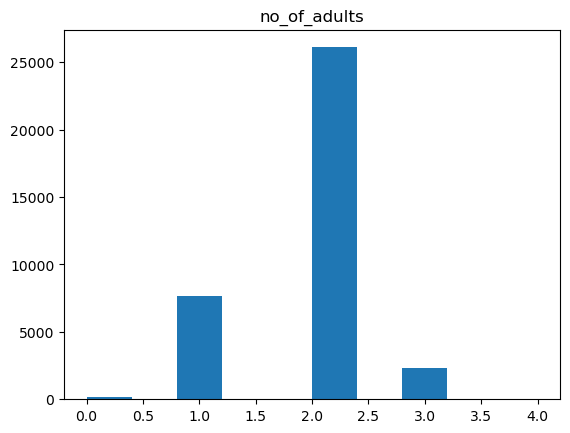

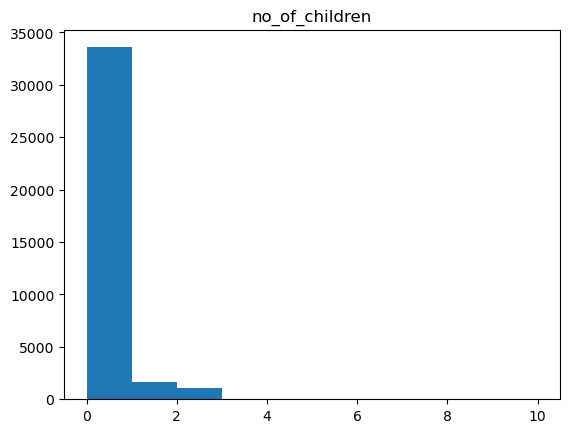

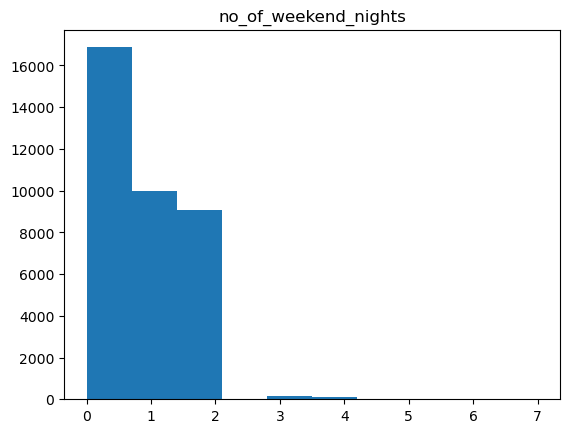

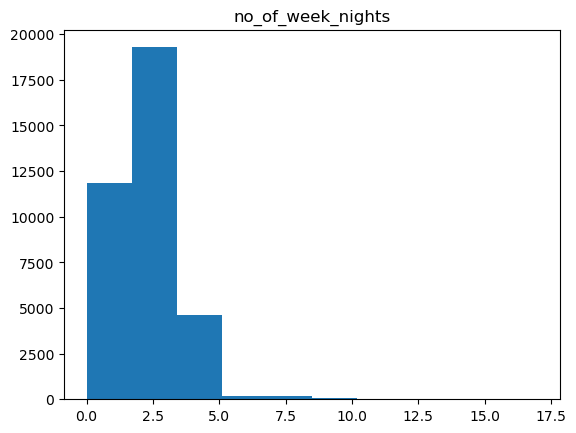

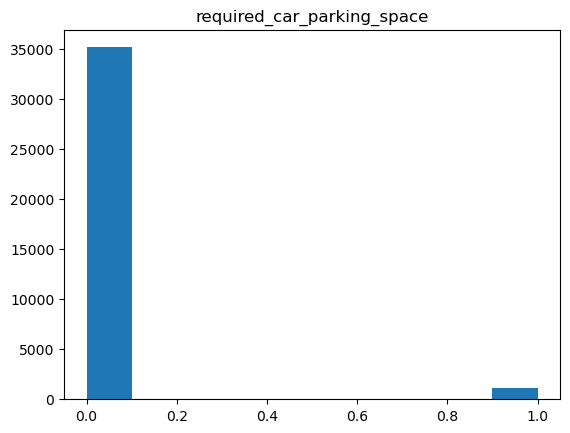

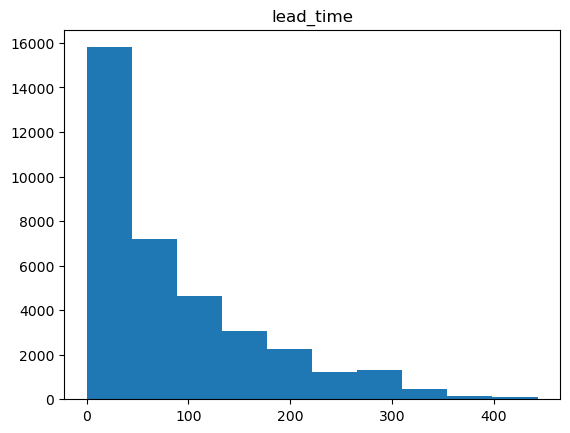

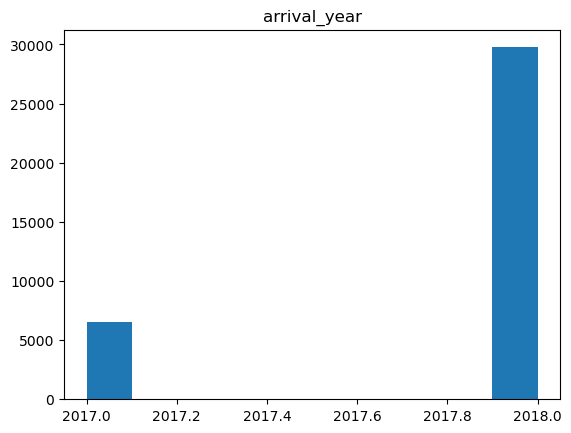

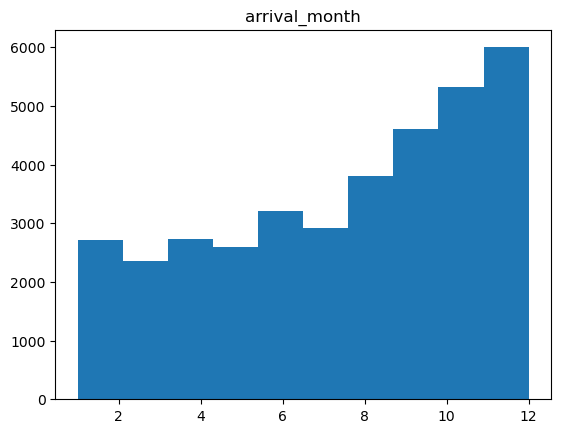

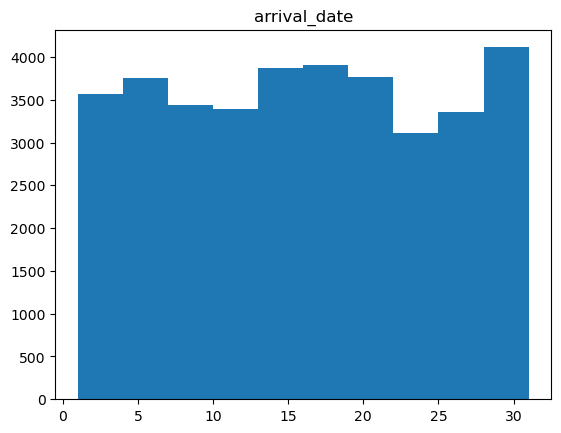

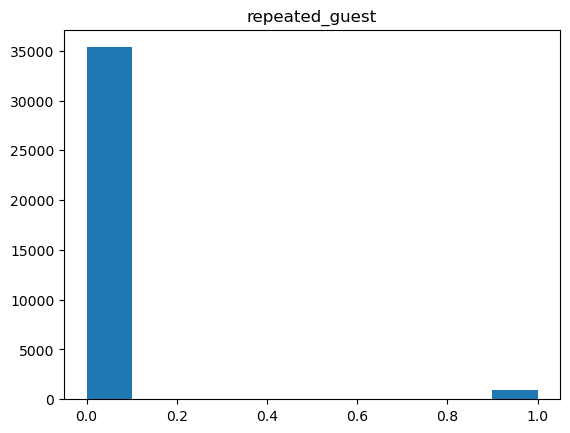

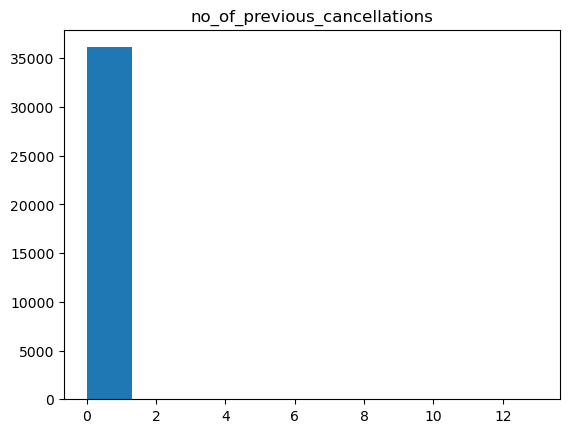

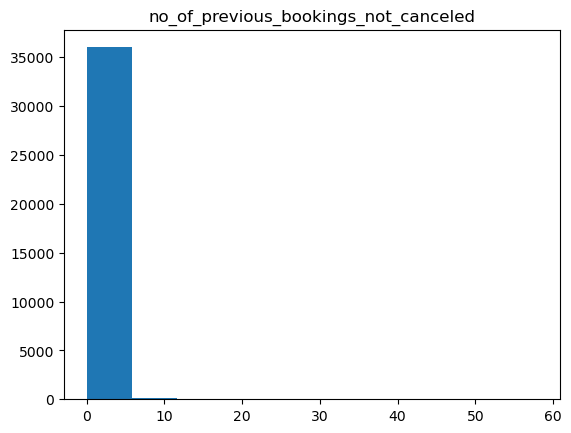

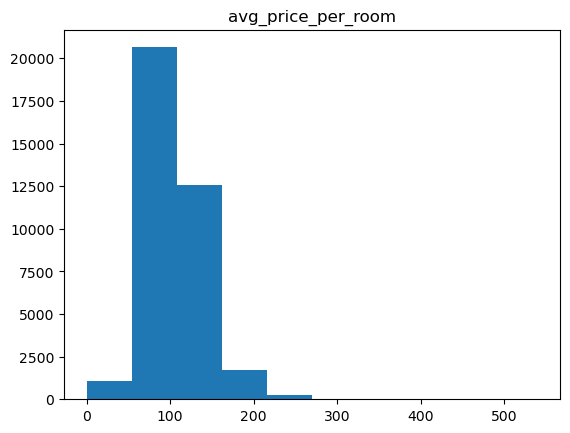

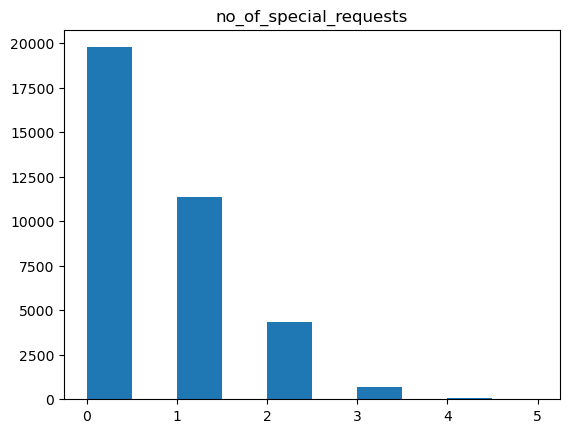

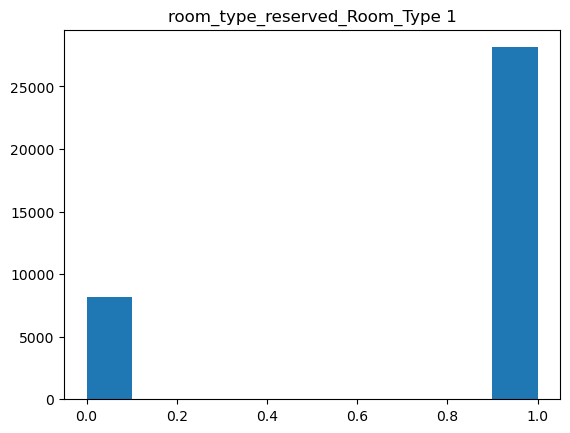

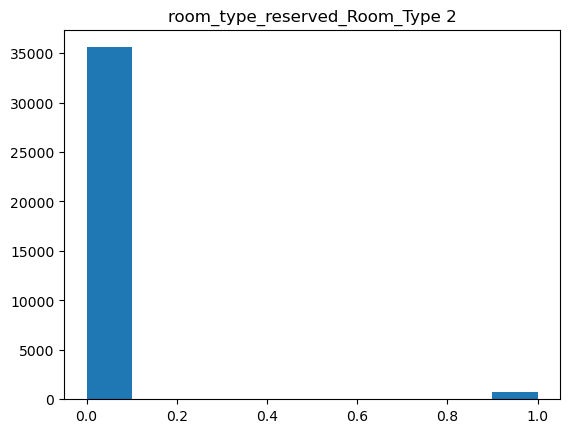

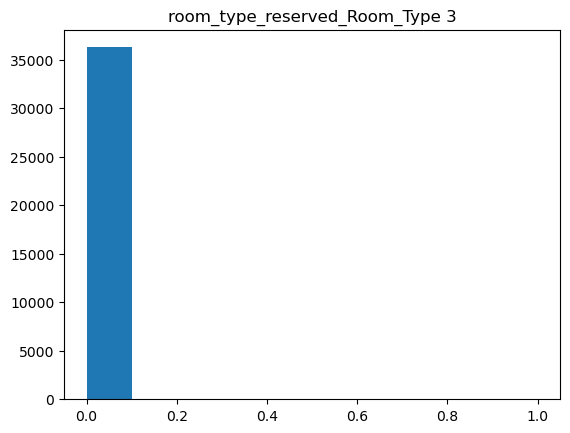

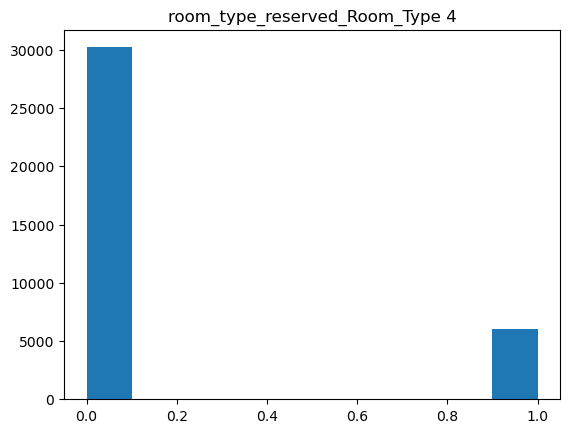

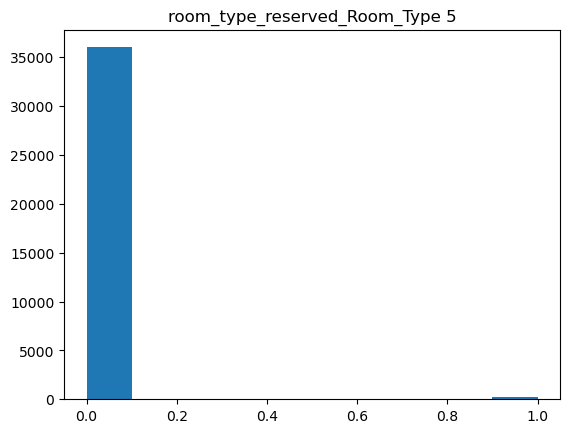

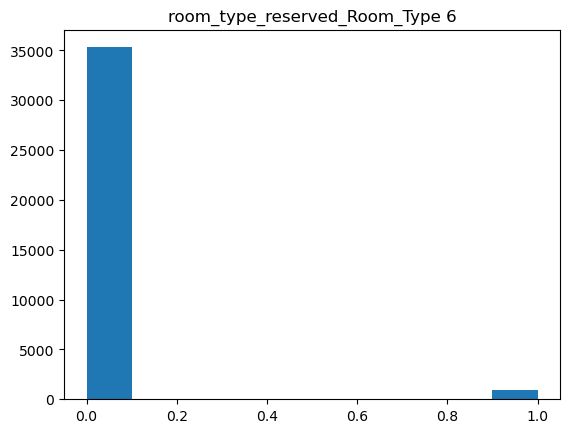

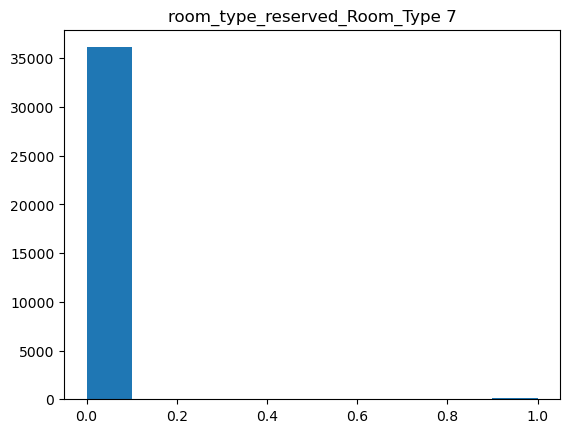

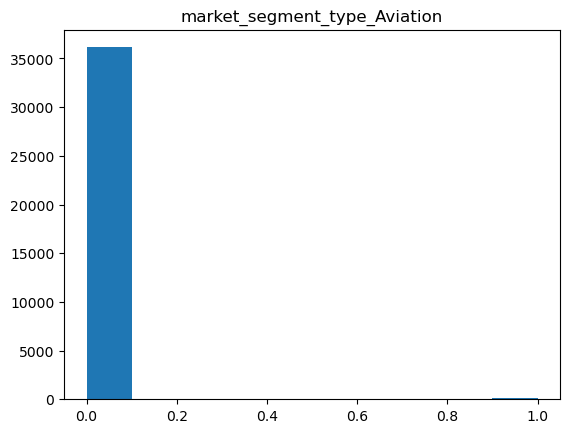

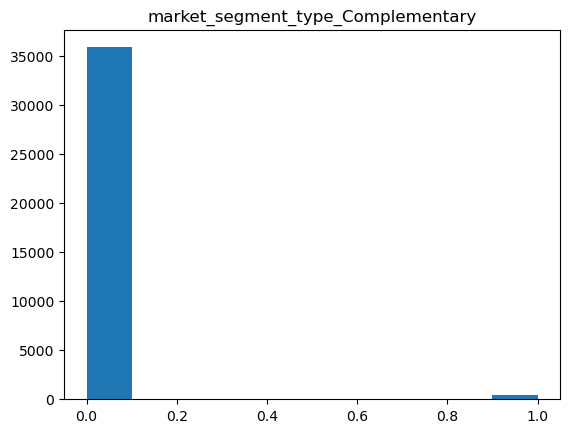

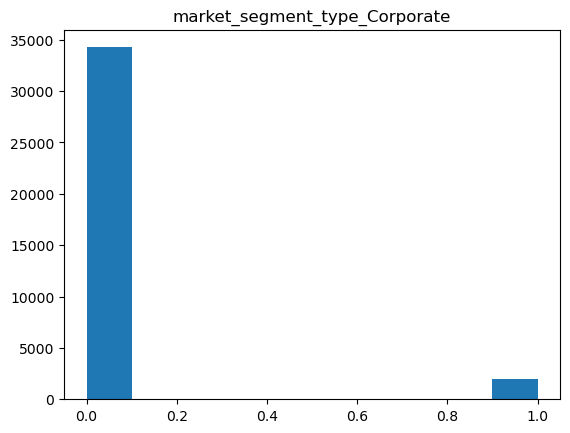

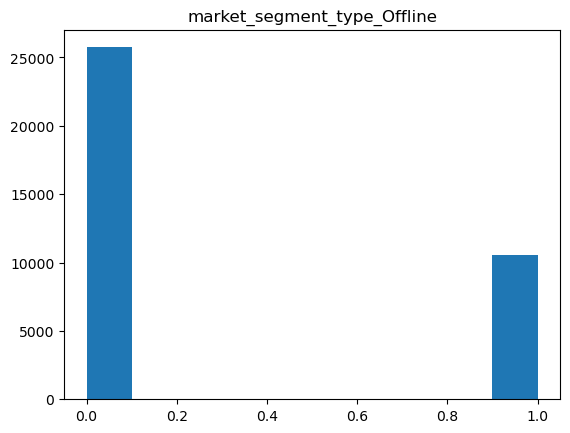

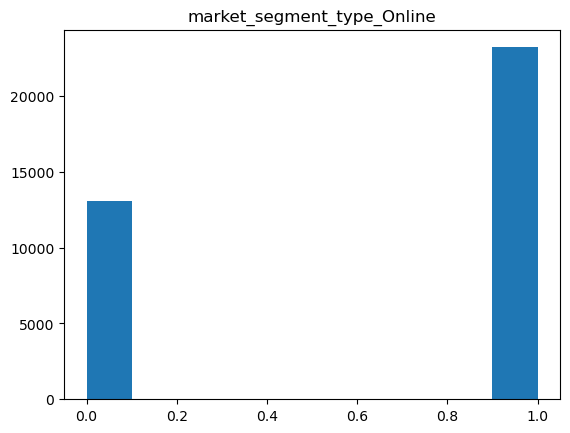

In [24]:
for col in data_encoded.columns[:-1]:
    plt.hist(data_encoded[col])
    plt.title(col)
    plt.show()

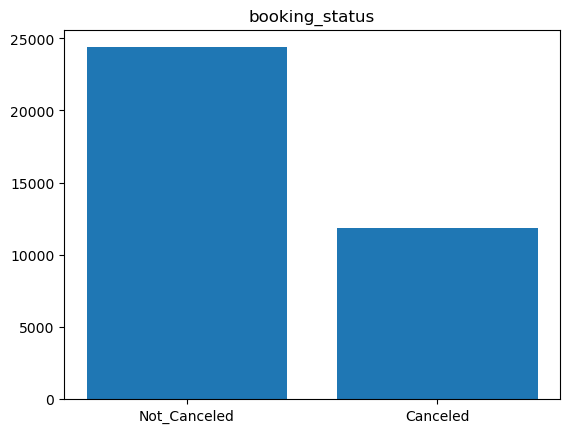

In [25]:
output_counts = data_encoded[data_encoded.columns[-1]].value_counts()
plt.bar(output_counts.index, output_counts.values)
plt.title(data_encoded.columns[-1])
plt.show()

In [26]:
train_data, test_data, train_target, test_target = train_test_split(
    data_encoded.iloc[:, :-1], data_encoded.iloc[:, -1], test_size=0.3, random_state=42
)
unseen_data = data_encoded.iloc[:, :-1].sample(frac=0.1, random_state=42)

In [27]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
unseen_data = scaler.transform(unseen_data)

In [28]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
dt_clf = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt_clf, dt_params, cv=5, n_jobs=-1, verbose=1)
dt_grid_search.fit(train_data, train_target)
dt_best_params = dt_grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [29]:
dt_best_params

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [31]:
# Train decision tree classifier with best parameters and measure performance
dt_clf = DecisionTreeClassifier(**dt_best_params, random_state=42)
dt_clf.fit(train_data, train_target)
train_pred = dt_clf.predict(train_data)
test_pred = dt_clf.predict(test_data)
print('Decision Tree Classifier:')
print('Train Accuracy:', accuracy_score(train_target, train_pred))
print('Test Accuracy:', accuracy_score(test_target, test_pred))
print('Confusion Matrix:\n', confusion_matrix(test_target, test_pred))

Decision Tree Classifier:
Train Accuracy: 0.9130828607435413
Test Accuracy: 0.8753101166957641
Confusion Matrix:
 [[2898  709]
 [ 648 6628]]


In [30]:
rf_params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
rf_clf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_clf, rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(train_data, train_target)
rf_best_params = rf_grid_search.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [32]:
# Train random forest classifier with best parameters and measure performance
rf_clf = RandomForestClassifier(**rf_best_params, random_state=42)
rf_clf.fit(train_data, train_target)
train_pred = rf_clf.predict(train_data)
test_pred = rf_clf.predict(test_data)
print('Random Forest Classifier:')
print('Train Accuracy:', accuracy_score(train_target, train_pred))
print('Test Accuracy:', accuracy_score(test_target, test_pred))
print('Confusion Matrix:\n', confusion_matrix(test_target, test_pred))

Random Forest Classifier:
Train Accuracy: 0.9942895400126024
Test Accuracy: 0.9071028209133511
Confusion Matrix:
 [[2968  639]
 [ 372 6904]]


In [33]:
# Use the trained model to make predictions on the unseen data
unseen_pred = rf_clf.predict(unseen_data)
print('Unseen Data Accuracy:', accuracy_score(data_encoded.iloc[:, -1].sample(frac=0.1, random_state=42), unseen_pred))

Unseen Data Accuracy: 0.9029768467475193


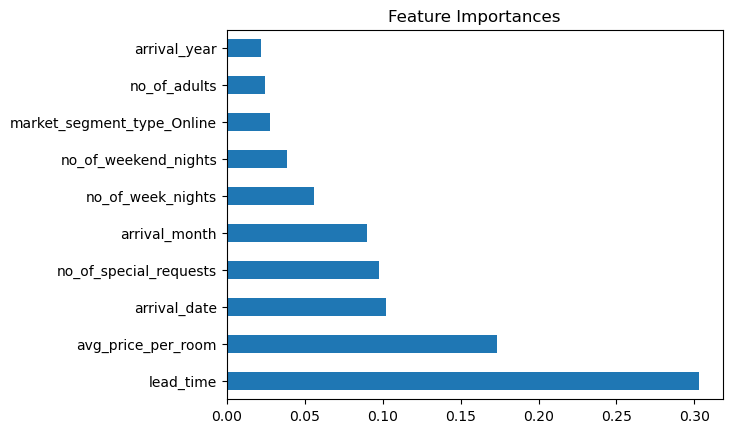

In [34]:
# Plot feature importances for the random forest classifier
feat_importances = pd.Series(rf_clf.feature_importances_, index=data_encoded.columns[:-1])
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()